In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = 'drive/MyDrive/dataset'

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(path+'/merged-data-final.csv')

# Display the first few rows of the DataFrame to understand its structure
df.head()

,Time (milliseconds),Ankle acceleration - horizontal forward,Ankle acceleration - vertical,Ankle acceleration - horizontal lateral,Upper leg acceleration - horizontal forward,Upper leg acceleration - vertical,Upper leg acceleration - horizontal lateral,Trunk acceleration - horizontal forward,Trunk acceleration - vertical,Trunk acceleration - horizontal lateral,Annotation
0,15.0,70.0,39.0,-970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.0,70.0,39.0,-970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.0,60.0,49.0,-960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62.0,60.0,49.0,-960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,50.0,39.0,-960.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values if any
df.dropna(inplace=True)

Missing values:
 Time (milliseconds)                            10
Ankle acceleration - horizontal forward        10
Ankle acceleration - vertical                  10
Ankle acceleration - horizontal lateral        10
Upper leg acceleration - horizontal forward    10
Upper leg acceleration - vertical              10
Upper leg acceleration - horizontal lateral    10
Trunk acceleration - horizontal forward        10
Trunk acceleration - vertical                  10
Trunk acceleration - horizontal lateral        10
Annotation                                     10
dtype: int64


In [5]:
# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)

Missing values after imputation:
 Time (milliseconds)                            0
Ankle acceleration - horizontal forward        0
Ankle acceleration - vertical                  0
Ankle acceleration - horizontal lateral        0
Upper leg acceleration - horizontal forward    0
Upper leg acceleration - vertical              0
Upper leg acceleration - horizontal lateral    0
Trunk acceleration - horizontal forward        0
Trunk acceleration - vertical                  0
Trunk acceleration - horizontal lateral        0
Annotation                                     0
dtype: int64


In [6]:
# Calculate basic statistics
basic_stats = df.describe()
print("Basic statistics:\n", basic_stats)

Basic statistics:
        Time (milliseconds)  Ankle acceleration - horizontal forward  \
count         1.048565e+06                             1.048565e+06   
mean          9.492138e+05                            -8.139324e+01   
std           7.052767e+05                             4.840392e+02   
min           1.500000e+01                            -2.892700e+04   
25%           3.741710e+05                            -2.120000e+02   
50%           8.035310e+05                            -7.000000e+01   
75%           1.380343e+06                             7.000000e+01   
max           3.058390e+06                             3.072300e+04   

       Ankle acceleration - vertical  Ankle acceleration - horizontal lateral  \
count                   1.048565e+06                             1.048565e+06   
mean                    7.883498e+02                             3.344758e+01   
std                     5.053828e+02                             5.835908e+02   
min              

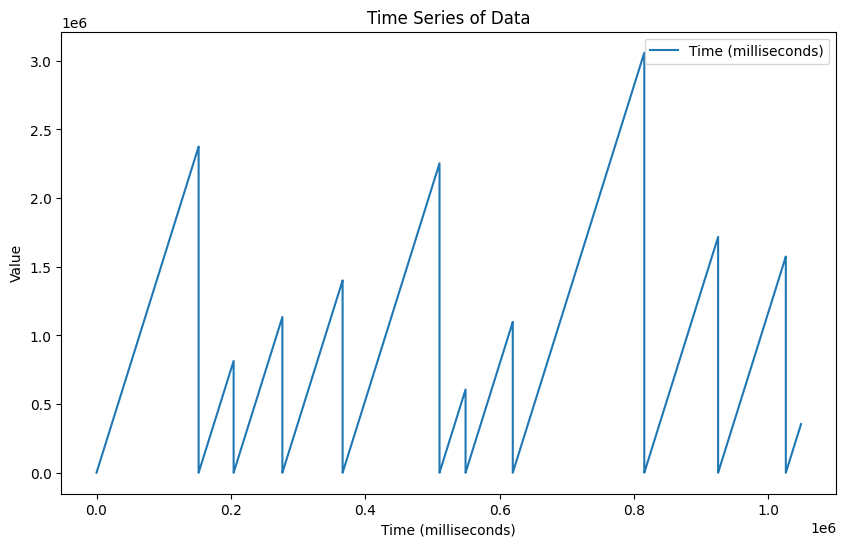

In [7]:
import matplotlib.pyplot as plt

# Plot time series of accelerometer data for each body location
plt.figure(figsize=(10, 6))
plt.plot(df['Time (milliseconds)'], label='Time (milliseconds)')

plt.xlabel('Time (milliseconds)')
plt.ylabel('Value')
plt.title('Time Series of Data')
plt.legend()
plt.show()

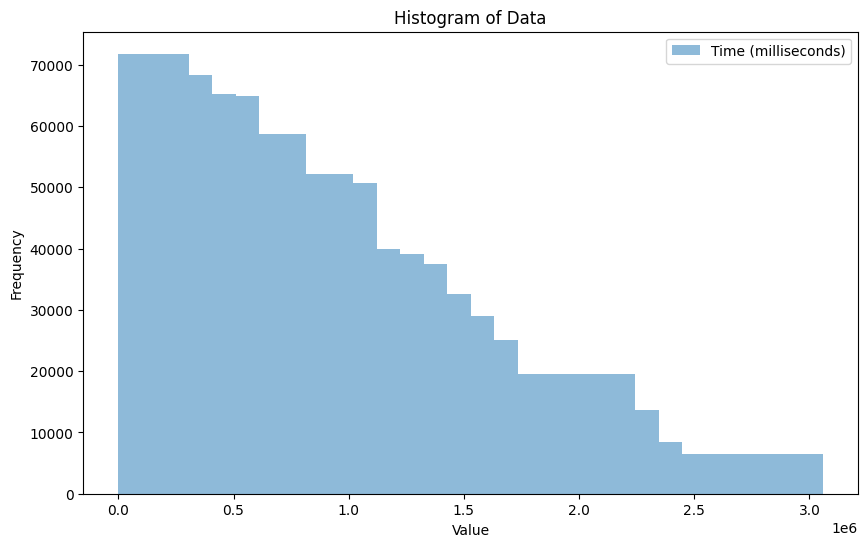

In [8]:
# Plot histograms or density plots
plt.figure(figsize=(10, 6))
plt.hist(df['Time (milliseconds)'], bins=30, alpha=0.5, label='Time (milliseconds)')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.legend()
plt.show()

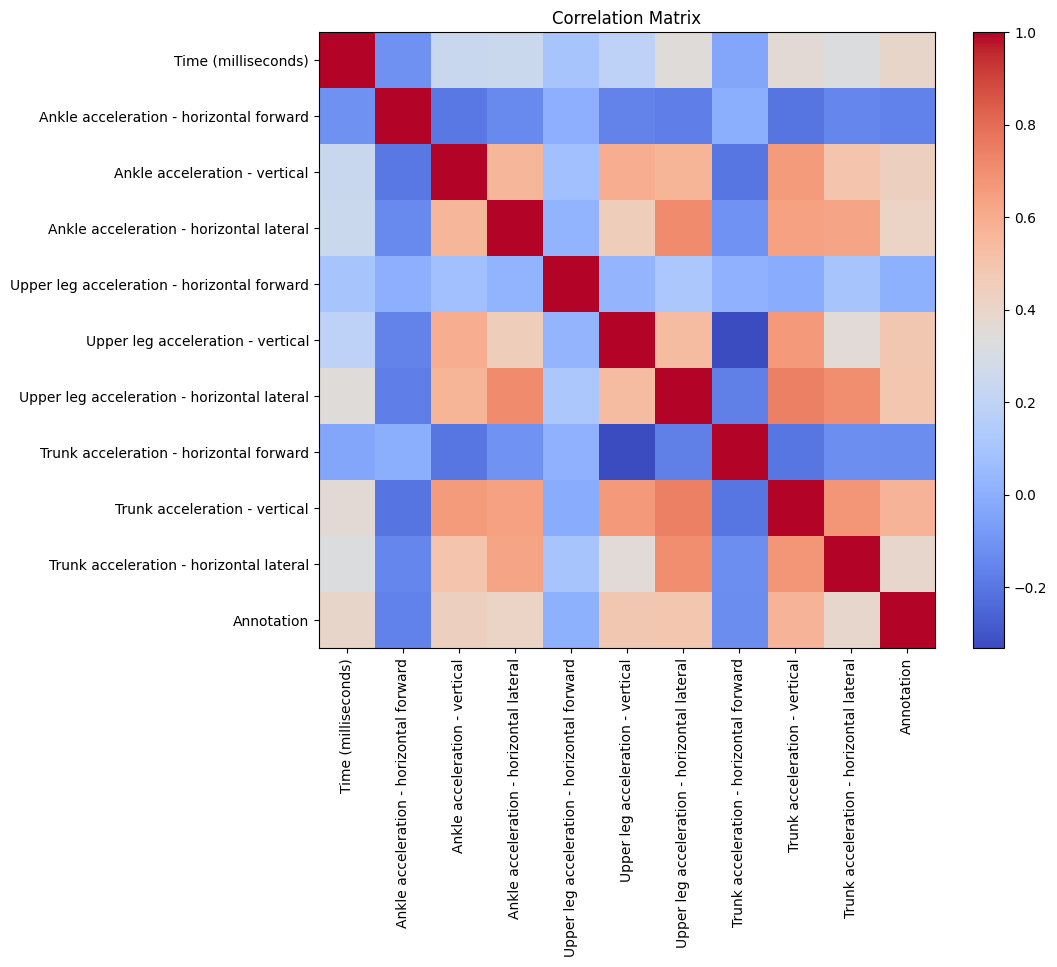

In [9]:
# Explore correlations between different columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Annotation'])  # Features
y = df['Annotation']  # Target variable

In [12]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize the models
logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [15]:
# Train the models
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [17]:
# Train the models
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.utils import resample

In [19]:
# Subsample the data
subsample_size = 10000
X_train_subsampled, y_train_subsampled = resample(X_train_scaled, y_train, n_samples=subsample_size, random_state=42)

In [20]:
# Train the SVM model using the subsampled data
svm_model.fit(X_train_subsampled, y_train_subsampled)

SVC(random_state=42)

In [21]:
# Predictions
y_pred_log_reg = logistic_regression_model.predict(X_test_scaled)

In [22]:
# Predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)

In [23]:
# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

In [24]:
# Model evaluation
print("Logistic Regression Model:")

Logistic Regression Model:


In [25]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Accuracy: 0.7758555740464349


In [26]:
# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.71      0.79     88457
         1.0       0.73      0.92      0.81    108060
         2.0       0.24      0.01      0.02     13196

    accuracy                           0.78    209713
   macro avg       0.61      0.55      0.54    209713
weighted avg       0.76      0.78      0.75    209713



In [27]:
# Model evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Confusion Matrix:
 [[63105 25296    56]
 [ 8184 99452   424]
 [ 1001 12045   150]]


In [28]:
print("\nRandom Forest Model:")


Random Forest Model:


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9635597220963888


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     88457
         1.0       0.95      0.99      0.97    108060
         2.0       0.86      0.60      0.71     13196

    accuracy                           0.96    209713
   macro avg       0.93      0.86      0.89    209713
weighted avg       0.96      0.96      0.96    209713



In [31]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[ 87485    832    140]
 [   246 106654   1160]
 [   169   5095   7932]]


In [32]:
print("\nSupport Vector Machine (SVM) Model:")


Support Vector Machine (SVM) Model:


In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.8257380324538774


In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.78      0.85     88457
         1.0       0.77      0.96      0.85    108060
         2.0       0.61      0.00      0.00     13196

    accuracy                           0.83    209713
   macro avg       0.77      0.58      0.57    209713
weighted avg       0.83      0.83      0.80    209713



In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
 [[ 69261  19196      0]
 [  4161 103885     14]
 [   562  12612     22]]
